In [1]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax

import numpy as np

import pandas as pd
from pandas.plotting import parallel_coordinates
from pandas import DataFrame

import math

import seaborn as sns
sns.set(style='ticks')

from scipy import stats
import scipy.stats as ss

import pylab
from pylab import figure, axes, pie, title, show

import sklearn
from sklearn.decomposition import PCA


%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
spacewalks = pd.read_csv('spacewalk_with_orbital_data.csv', delimiter=',', encoding='utf-8')
n = len(spacewalks)


In [3]:
#The calcualted fields for this dataset are all calcualted in this cell. Formulas from 

earthEquitorialRadius_mi = 3963
earthsGravitationalConstant = 398600.4

#Apoapsis from earth's center (miles)
spacewalks['realAp'] = spacewalks['orbit_apoapsis']+earthEquitorialRadius_mi

#Periapsis from earth's center (miles)
spacewalks['realPer'] = spacewalks['orbit_periapsis'] + earthEquitorialRadius_mi

#Seconds for each spacewalk
spacewalks['period_in_seconds'] = spacewalks['orbit_period']*60

#Semimajor axis (in miles) defined as (Apoapsis + Periapsis) / 2
spacewalks['semi_major_axis'] = (spacewalks['realAp'] + spacewalks['realPer']) / 2

#Eccentricity defined as (Apoapsis-Periapsis) / (Apoapsis+Periapsis)
spacewalks['eccentricity'] = (spacewalks['realAp'] - spacewalks['realPer']) / (spacewalks['realAp'] + spacewalks['realPer'])

#Conversion of semimajor axis to metric
spacewalks['semi_major_axis_meters'] = spacewalks['semi_major_axis'] * 1.609344

#Calculation of semiminor acis defines as Semimajor Axis * (square root of (1-(eccentricity squared))
spacewalks['semi_minor_axis_meters'] = spacewalks['semi_major_axis_meters'] * np.sqrt( 1 - (spacewalks['eccentricity']**2))

#Calculate predicted period based on orbital parameters. Defined as 2pi * (square root of (the semimajor axis cubed over the Gravitational Constant)
spacewalks['predicted_period'] = 2 * math.pi * np.sqrt((spacewalks['semi_major_axis_meters']**3) / earthsGravitationalConstant)

#Calculate the orbital perimeter as the perimeter of an ellipse
spacewalks['orbital_perimeter'] = math.pi * ((3*(spacewalks['semi_major_axis_meters']+spacewalks['semi_minor_axis_meters'])) - np.sqrt(  ((3*spacewalks['semi_major_axis_meters'])+spacewalks['semi_minor_axis_meters'])  *  (spacewalks['semi_major_axis_meters'] +(3*spacewalks['semi_minor_axis_meters']))  ) )

#Orbital velicity as a function of distance per orbit / orbital period
spacewalks['orbital_velocity'] = (spacewalks['orbital_perimeter'] * 1000) / spacewalks['period_in_seconds']

#Spacewalk distance as a function of velocity * time in EVA
spacewalks['distance_spacewalked_in_meters'] = spacewalks['orbital_velocity'] * spacewalks['spacewalk_duration_in_seconds']








In [4]:
#This step creates a final dataset for visualization
df = spacewalks
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["distance_spacewalked_in_meters"], how="all")
df.to_csv('spacewalks_with_calculated_fields.csv', encoding='utf-8')

#Test DataFrame for geovisualization troubleshooting
dfgeoviz = spacewalks.iloc[0]

In [5]:
#Data sorted by highest orbital velocities. 
#Change the string 'orbital_velocity' to any category printed in the next cell to explort the data
df.nlargest(5, 'orbital_velocity')

Unnamed: 0  EVA # Country  \
366         366  325.0  Russia   
367         367  326.0  Russia   
368         368  327.0  Russia   
369         369  328.0  Russia   
370         370  329.0  Russia   

                                                  Crew      Vehicle  \
366      G. Padelka                     Sergei Avdeyev  Soyuz TM-28   
367      G. Padelka                     Sergei Avdeyev  Soyuz TM-28   
368  Victor Afanasyev                  Jean-Pierre ...  Soyuz TM-29   
369  Victor Afanasyev                   Sergei Avdeyev  Soyuz TM-29   
370  Victor Afanasyev                   Sergei Avdeyev  Soyuz TM-29   

           Date Duration                                           Purpose   \
366   9/15/1998     0:30  Internal EVA inside Spektr to connect solar ar...   
367  11/10/1998     5:50  Manual launch of Sputnik demo satellite.  Inst...   
368   4/16/1999     6:19  Attempted demo of leak repair device failed du...   
369   7/23/1999     6:07  Installed a new experimental 6-meter diameter ...   
370   7/28/1999     5:22  Finished full deploy of an experimental 6-mete...   

     was_moonshot            crew_0               ...                \
366         False        G. Padelka               ...                 
367         False        G. Padelka               ...                 
368         False  Victor Afanasyev               ...                 
369         False  Victor Afanasyev               ...                 
370         False  Victor Afanasyev               ...                 

         realPer period_in_seconds  semi_major_axis  eccentricity  \
366  4081.060526            5310.0      4107.064910      0.006332   
367  4081.060526            5310.0      4107.064910      0.006332   
368  4079.817784            5316.0      4106.226059      0.006431   
369  4079.817784            5316.0      4106.226059      0.006431   
370  4079.817784            5316.0      4106.226059      0.006431   

     semi_major_axis_meters  semi_minor_axis_meters predicted_period  \
366             6609.680271             6609.547781      5347.880339   
367             6609.680271             6609.547781      5347.880339   
368             6608.330271             6608.193605      5346.241999   
369             6608.330271             6608.193605      5346.241999   
370             6608.330271             6608.193605      5346.241999   

     orbital_perimeter  orbital_velocity  distance_spacewalked_in_meters  
366       41529.429735       7820.984884                    1.407777e+07  
367       41529.429735       7820.984884                    1.642407e+08  
368       41520.934317       7810.559503                    1.776121e+08  
369       41520.934317       7810.559503                    1.719885e+08  
370       41520.934317       7810.559503                    1.509000e+08  

[5 rows x 39 columns]

In [6]:
list(df.columns.values)

['Unnamed: 0',
 'EVA #',
 'Country',
 'Crew',
 'Vehicle',
 'Date',
 'Duration',
 'Purpose ',
 'was_moonshot',
 'crew_0',
 'crew_1',
 'crew_2',
 'spacewalk_duration_in_seconds',
 'EVA_start_year',
 'EVA_start_month',
 'EVA_start_day',
 'mission_type',
 'orbit_periapsis',
 'orbit_apoapsis',
 'orbit_inclination',
 'orbit_period',
 'orbit_completed',
 'duration_months',
 'duration_days',
 'duration_hours',
 'duration_minutes',
 'duration_seconds',
 'total_duration_in_seconds',
 'realAp',
 'realPer',
 'period_in_seconds',
 'semi_major_axis',
 'eccentricity',
 'semi_major_axis_meters',
 'semi_minor_axis_meters',
 'predicted_period',
 'orbital_perimeter',
 'orbital_velocity',
 'distance_spacewalked_in_meters']

In [7]:
#First 20 values of 'orbit_inclination" make the pattern in this data visible
df['orbit_inclination'].head(20)

0     32.5
1     28.9
2     28.8
3     28.8
4     28.8
5     28.8
6     28.8
7     28.8
8     28.8
9     28.8
10    33.8
11    33.8
36    50.0
37    50.0
38    50.0
39    50.0
40    50.0
41    50.0
42    50.0
43    50.0
Name: orbit_inclination, dtype: float64

In [8]:
#Data sorted by highest orbital inclination 
df.nlargest(20, 'orbit_inclination')

Unnamed: 0  EVA # Country  \
274         274  233.0  Russia   
53           53   52.0     USA   
76           76   74.0     USA   
275         275  234.0  Russia   
323         323  277.0  Russia   
398         398  372.0  Russia   
277         277  236.0  Russia   
278         278  237.0  Russia   
120         120  117.0     USA   
121         121  117.0     USA   
122         122  336.0  Russia   
123         123  336.0  Russia   
124         124  337.0  Russia   
125         125  337.0  Russia   
144         144  136.0     USA   
145         145  137.0     USA   
149         149  141.0     USA   
150         150  141.0     USA   
151         151  348.0  Russia   
152         152  348.0  Russia   

                                               Crew        Vehicle  \
274                                   Alexei Leonov      Voskhod 2   
53             Dave Leestma          Kathy Sullivan        STS-41G   
76              Mark Lee                Carl Meade          STS-64   
275        Aleksei Yeliseyov        Yevgeni Khrunov        Soyuz 4   
323            Alexandr Volkov      Sergei Krikalev    Soyuz TM-13   
398        Aleksei Yeliseyov        Yevgeni Khrunov        Soyuz 5   
277                Yuri Romanenko    Georgi Grechko       Soyuz 26   
278   Vladimir Kovalyonok     Alexandr Ivanchenkov        Soyuz 29   
120            Carl Walz                 Dan Bursch   Expedition 4   
121            Carl Walz                 Dan Bursch   Expedition 4   
122             Yri Onufrienko            Carl Walz   Expedition 4   
123             Yri Onufrienko            Carl Walz   Expedition 4   
124         Yuri Onufrienko              Dan Bursch   Expedition 4   
125         Yuri Onufrienko              Dan Bursch   Expedition 4   
144                   Ken Bowersox       Don Pettit   Expedition 6   
145                   Ken Bowersox       Don Pettit   Expedition 6   
149             Bill McArthur        Valeri Tokarev  Expedition 12   
150             Bill McArthur        Valeri Tokarev  Expedition 12   
151  Valeri Tokarev           Bill McArthur          Expedition 12   
152  Valeri Tokarev           Bill McArthur          Expedition 12   

               Date Duration  \
274   Mar. 18, 1965     0:12   
53       10/11/1984     3:29   
76        9/16/1994     6:51   
275   Jan. 16, 1969     0:37   
323  Feb. 20, 1992      4:13   
398   Jan. 16, 1969     0:37   
277   Dec. 20, 1977     1:28   
278       7/29/1978     2:05   
120       2/20/2002     5:49   
121       2/20/2002     5:49   
122       1/14/2002     6:03   
123       1/14/2002     6:03   
124       1/25/2002     5:59   
125       1/25/2002     5:59   
144       1/15/2003     6:51   
145        4/8/2003     6:26   
149       11/7/2005     5:22   
150       11/7/2005     5:22   
151        2/3/2006     5:44   
152        2/3/2006     5:44   

                                              Purpose   was_moonshot  \
274  WorldÂs first EVA, Berkut umbilical suit, Vol...         False   
53   First U.S. female EVA.  Demonstrated hydrazine...         False   
76              SAFER self rescue demo, test new tools         False   
275  New airlock, Yastreb self-contained life suppo...         False   
323  V. suit cooling sublimator failed so must stay...         False   
398  New airlock, Yastreb self-contained life suppo...         False   
277  Docking unit inspection. Tested new Orlan D su...         False   
278         Replace scientific samples, test new suits         False   
120  First use of the Quest airlock without Shuttle...         False   
121  First use of the Quest airlock without Shuttle...         False   
122  Relocated a cargo boom for the Russian Strela ...         False   
123  Relocated a cargo boom for the Russian Strela ...         False   
124  Installed 6 thruster deflector shields on SM. ...         False   
125  Installed 6 thruster deflector shields on SM. ...         False   
144  ISS based EVA.  Removed debris from Node nadir...         Fal

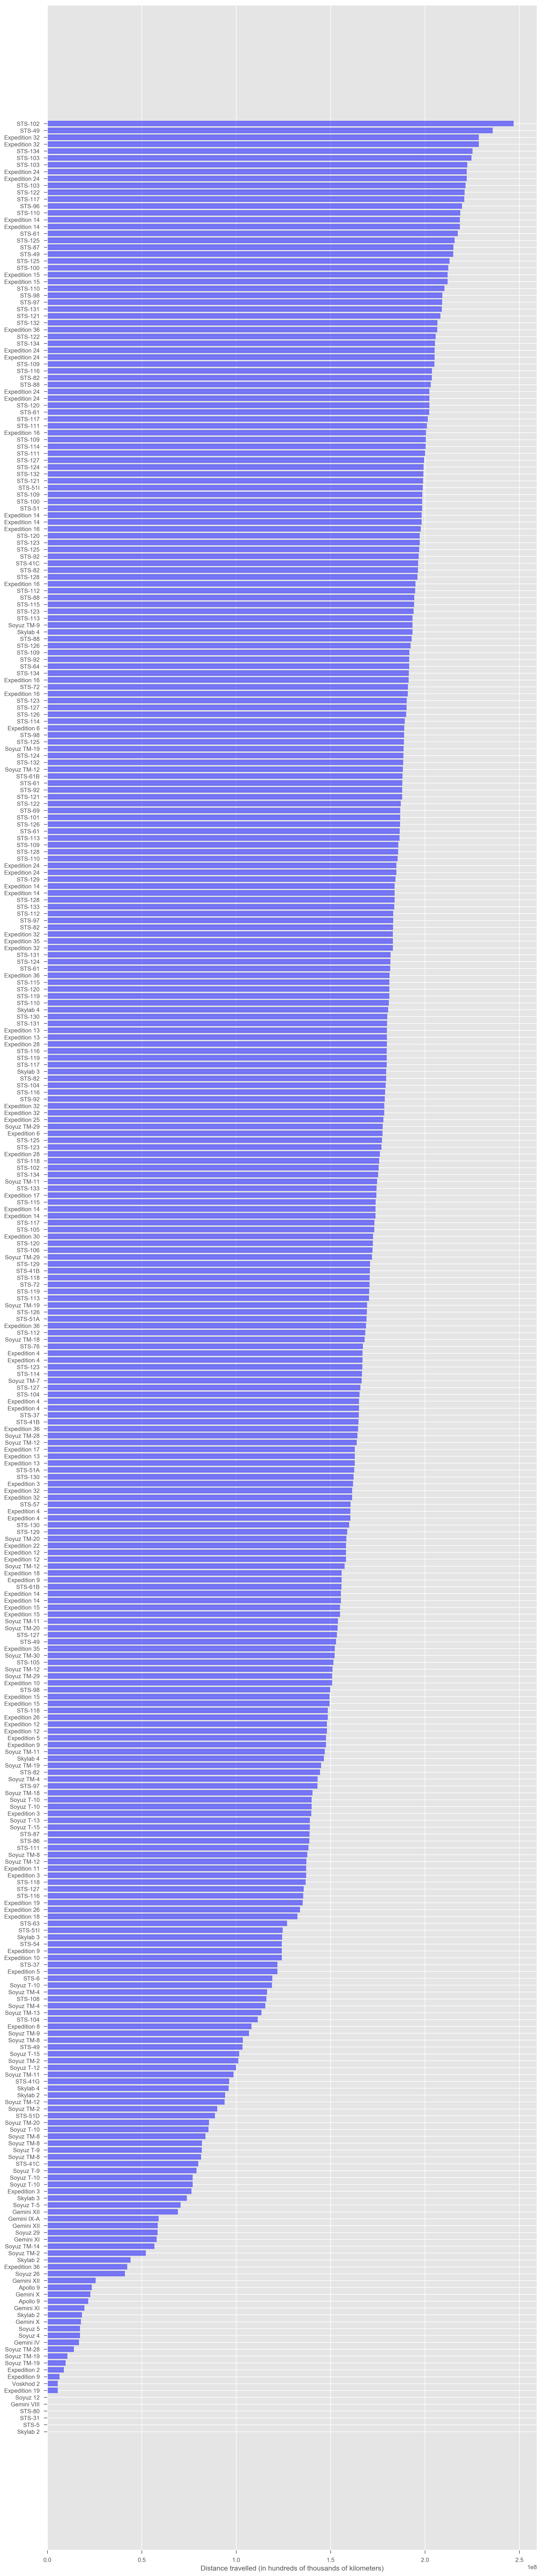

In [9]:
#Figure 1 visualization generation

#Sort the values so they print from highest to lowesr distance
df = df.sort_values('distance_spacewalked_in_meters', ascending = False)
df['index'] = np.arange(len(df))
df = df.set_index('index')

#Sets figure size to high definition
plt.figure(figsize=(15,80), dpi=240)

#Creates a text list for the labels
x = df['Vehicle'].tolist()

#Plots a horizintal bar graph from the sorted spacewalks
plt.barh(df.index, df['distance_spacewalked_in_meters'], tick_label = x, align = 'center', color = 'b', alpha = 0.5)

#Reverses the axes (defaults to lowest value first)
plt.gca().invert_yaxis()

#Formats x label
plt.xlabel("Distance travelled (in hundreds of thousands of kilometers)")

#Saves the figure as a png for clearer viewing
plt.savefig('fig1.png', bbox_inches='tight', dpi = 240)
plt.show()




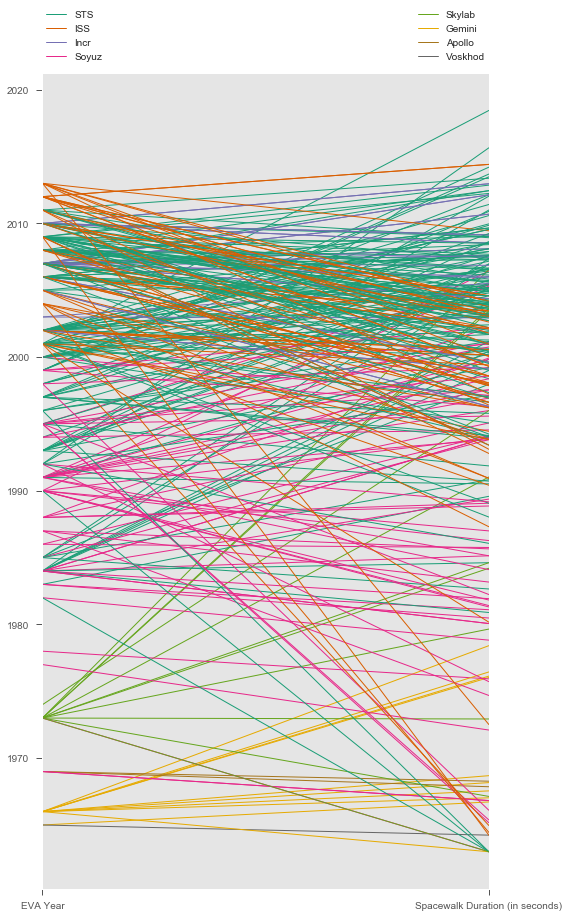

In [10]:
#Figure 2 visualization generation
#Parallel Coordinate of EVA year and duration in seconds

#List to setp through only the field names we want in the PC graph
parallel_coord_fields = ['mission_type', 'EVA_start_year', 'spacewalk_duration_in_seconds']

#Creates a new small dataframe of just the deisred columns
df_pc = pd.DataFrame(df['mission_type'])
df_pc['EVA Year'] = df['EVA_start_year']

#The math done here scales the data so that the axes lineup
df_pc['Spacewalk Duration (in seconds)'] = (df['spacewalk_duration_in_seconds'] / 580) + 1963

#Set figure size to lengthen the image and spread the lines apart
plt.figure(figsize=(8,15))

#Create parallel coordinate chart from pandas.plotting
parallel_coordinates(df_pc, 'mission_type', linewidth = 1, colormap='Dark2')

#Formats the legent to sit at top, ancored based on the dimension of the image
plt.legend(bbox_to_anchor=(0., 0.98, 1., .102), loc='best', ncol=2, mode="expand", borderaxespad=0.)

#Saves the figure as a png for  viewing
plt.savefig('fig2.png', bbox_inches='tight', dpi = 240)
plt.show()

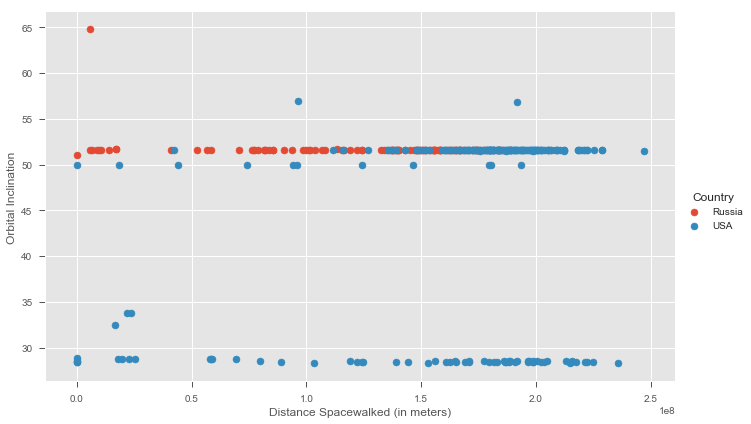

In [11]:
#Figure 3 is a Scatterplot of inclination, spacewalk distance, and colored by country

#Creates strings for the plotting function
x = 'distance_spacewalked_in_meters'
y = 'orbit_inclination'
label = 'Country'

#Country list for the categories the plotting function is looking for within 'Country'
country = ['Russia','USA'] 

#Creates a FacetGrid object from the seaborn library
fg = sns.FacetGrid(data=df, hue='Country', hue_order=country, aspect=1.6, size =6)

#Maps the data using the FacetGrid object
fg.map(plt.scatter, x, y).add_legend()

#Formats labels
plt.xlabel('Distance Spacewalked (in meters)')
plt.ylabel('Orbital Inclination')

#Saves the figure as a png for viewing
plt.savefig('fig3.png', bbox_inches='tight', dpi = 240)
plt.show()

In [12]:
#Stastics on predicted versus actual period
df['period_error']=df['period_in_seconds']-df['predicted_period']
df['period_error'].head(5)

index
0    2.835386
1   -0.293655
2    0.210453
3    0.210453
4    0.313622
Name: period_error, dtype: float64

In [13]:
#Stastical traits of the orbital period error are displayed as part of my data exploration process
print(np.mean(df['period_error']))
print(np.median(df['period_error']))
print(np.std(df['period_error']))
print(np.var(df['period_error']))

testdf = pd.DataFrame()
testdf['actual'] = df['period_in_seconds']
testdf['predicted'] = df['predicted_period']
#testdf['error'] = df['period_error']

print("\n")
print(np.mean(df['period_in_seconds']))
print(np.mean(df['predicted_period']))

6.264892871115202
0.210452903852
38.75166040425001
1501.6911840863181


5520.770919881305
5514.506027010199


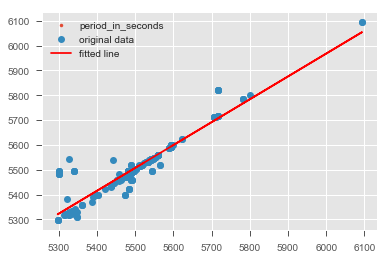

0.921096739407 441.377398959 0.932727631652 1.84238898299e-150 0.0194550201637


In [14]:
#Figure 4 is the linear regression of the calculated and actual orbital period data

#Creates new variables for the model
Y = df['period_in_seconds']
X = df['predicted_period']
X1 = df['period_error']

#Plots the data as a basic scatterplot
plt.plot(X,Y,'.')

#Performs the linear regression and generates the linregress fit line values
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
r_squared = r_value ** 2

#Plotting the linear regression
plt.plot(X, Y, 'o', label='original data')
plt.plot(X, intercept + slope*X, 'r', label='fitted line')
plt.legend()

#Saves the figure as a png for viewing
plt.savefig('fig4.png', bbox_inches='tight', dpi = 240)
plt.show()

#Print the linear regression values for analysis
print(slope, intercept, r_value, p_value, std_err)

GRADER: Grading of this project should end here.

Below is the code to construct a geovisualization of the orbital traces for missions based on data either parsed in this project, or parsable in the future. This is not a completed portion of the project

In [94]:
#Construction of test case of geovisualization

In [15]:
#Start by getting a single mission's data
#This single frame set aside earlier
dfgeoviz

Unnamed: 0                                                                        0
EVA #                                                                             1
Country                                                                         USA
Crew                                                                       Ed White
Vehicle                                                                   Gemini IV
Date                                                                       6/3/1965
Duration                                                                       0:36
Purpose                           First U.S. EVA. Used HHMU and took  photos.  G...
was_moonshot                                                                  False
crew_0                                                                     Ed White
crew_1                                                                          NaN
crew_2                                                                      

In [16]:
#Fields that woudl need parsed and systematically added to the data set are created here for a single mission
#These values are specific to Ed White's Gemini 4 spacewalk, and gathed from the mission's wikipedia page manually. 
#Ignoring errors here. This data should be coming from a dataframe passed correctly. This error is fine in this test case and values are set

dfgeoviz.loc['Launch_year'] = 1965
dfgeoviz.loc['Launch_month'] = 6
dfgeoviz.loc['Launch_day'] = 3
dfgeoviz.loc['Launch_hour'] = 15
dfgeoviz.loc['Launch_minute'] = 15
dfgeoviz.loc['Launch_second'] = 59


dfgeoviz.loc['EVA_start_hour'] = 19
dfgeoviz.loc['EVA_start_minute'] = 34
dfgeoviz.loc['EVA_start_second'] = 0

dfgeoviz.loc['LaunchLON'] = -80.577778
dfgeoviz.loc['LaunchLAT'] = 28.488889

dfgeoviz.loc['LandingLON'] = -74.183333
dfgeoviz.loc['LandingLAT'] = 27.733333


C:\Users\Rick\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Rick\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rick\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Rick\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [17]:
#Append the data needed for a correct ground trace
import datetime
from datetime import timedelta

#The mission launch data and time can be parsed from the Infobox

launchdatetime = datetime.datetime(dfgeoviz['Launch_year'], dfgeoviz['Launch_month'], dfgeoviz['Launch_day'], dfgeoviz['Launch_hour'], dfgeoviz['Launch_minute'], dfgeoviz['Launch_second'])

evadatetime = datetime.datetime(dfgeoviz['EVA_start_year'], dfgeoviz['EVA_start_month'], dfgeoviz['EVA_start_day'], dfgeoviz['EVA_start_hour'], dfgeoviz['EVA_start_minute'], dfgeoviz['EVA_start_second'])

EVAend = evadatetime + datetime.timedelta(0,int(dfgeoviz['spacewalk_duration_in_seconds']))

EVAend


currenttime = launchdatetime
#for i in range(20):
    #currenttime = currenttime + datetime.timedelta(0, 0, 0, 0, (dfgeoviz['period_in_seconds']/240))
    
    #while currenttime < evadatetime:
    #    print(currenttime, False)

In [18]:
dfgeoviz

Unnamed: 0                                                                        0
EVA #                                                                             1
Country                                                                         USA
Crew                                                                       Ed White
Vehicle                                                                   Gemini IV
Date                                                                       6/3/1965
Duration                                                                       0:36
Purpose                           First U.S. EVA. Used HHMU and took  photos.  G...
was_moonshot                                                                  False
crew_0                                                                     Ed White
crew_1                                                                          NaN
crew_2                                                                      

C:\Users\Rick\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Rick\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


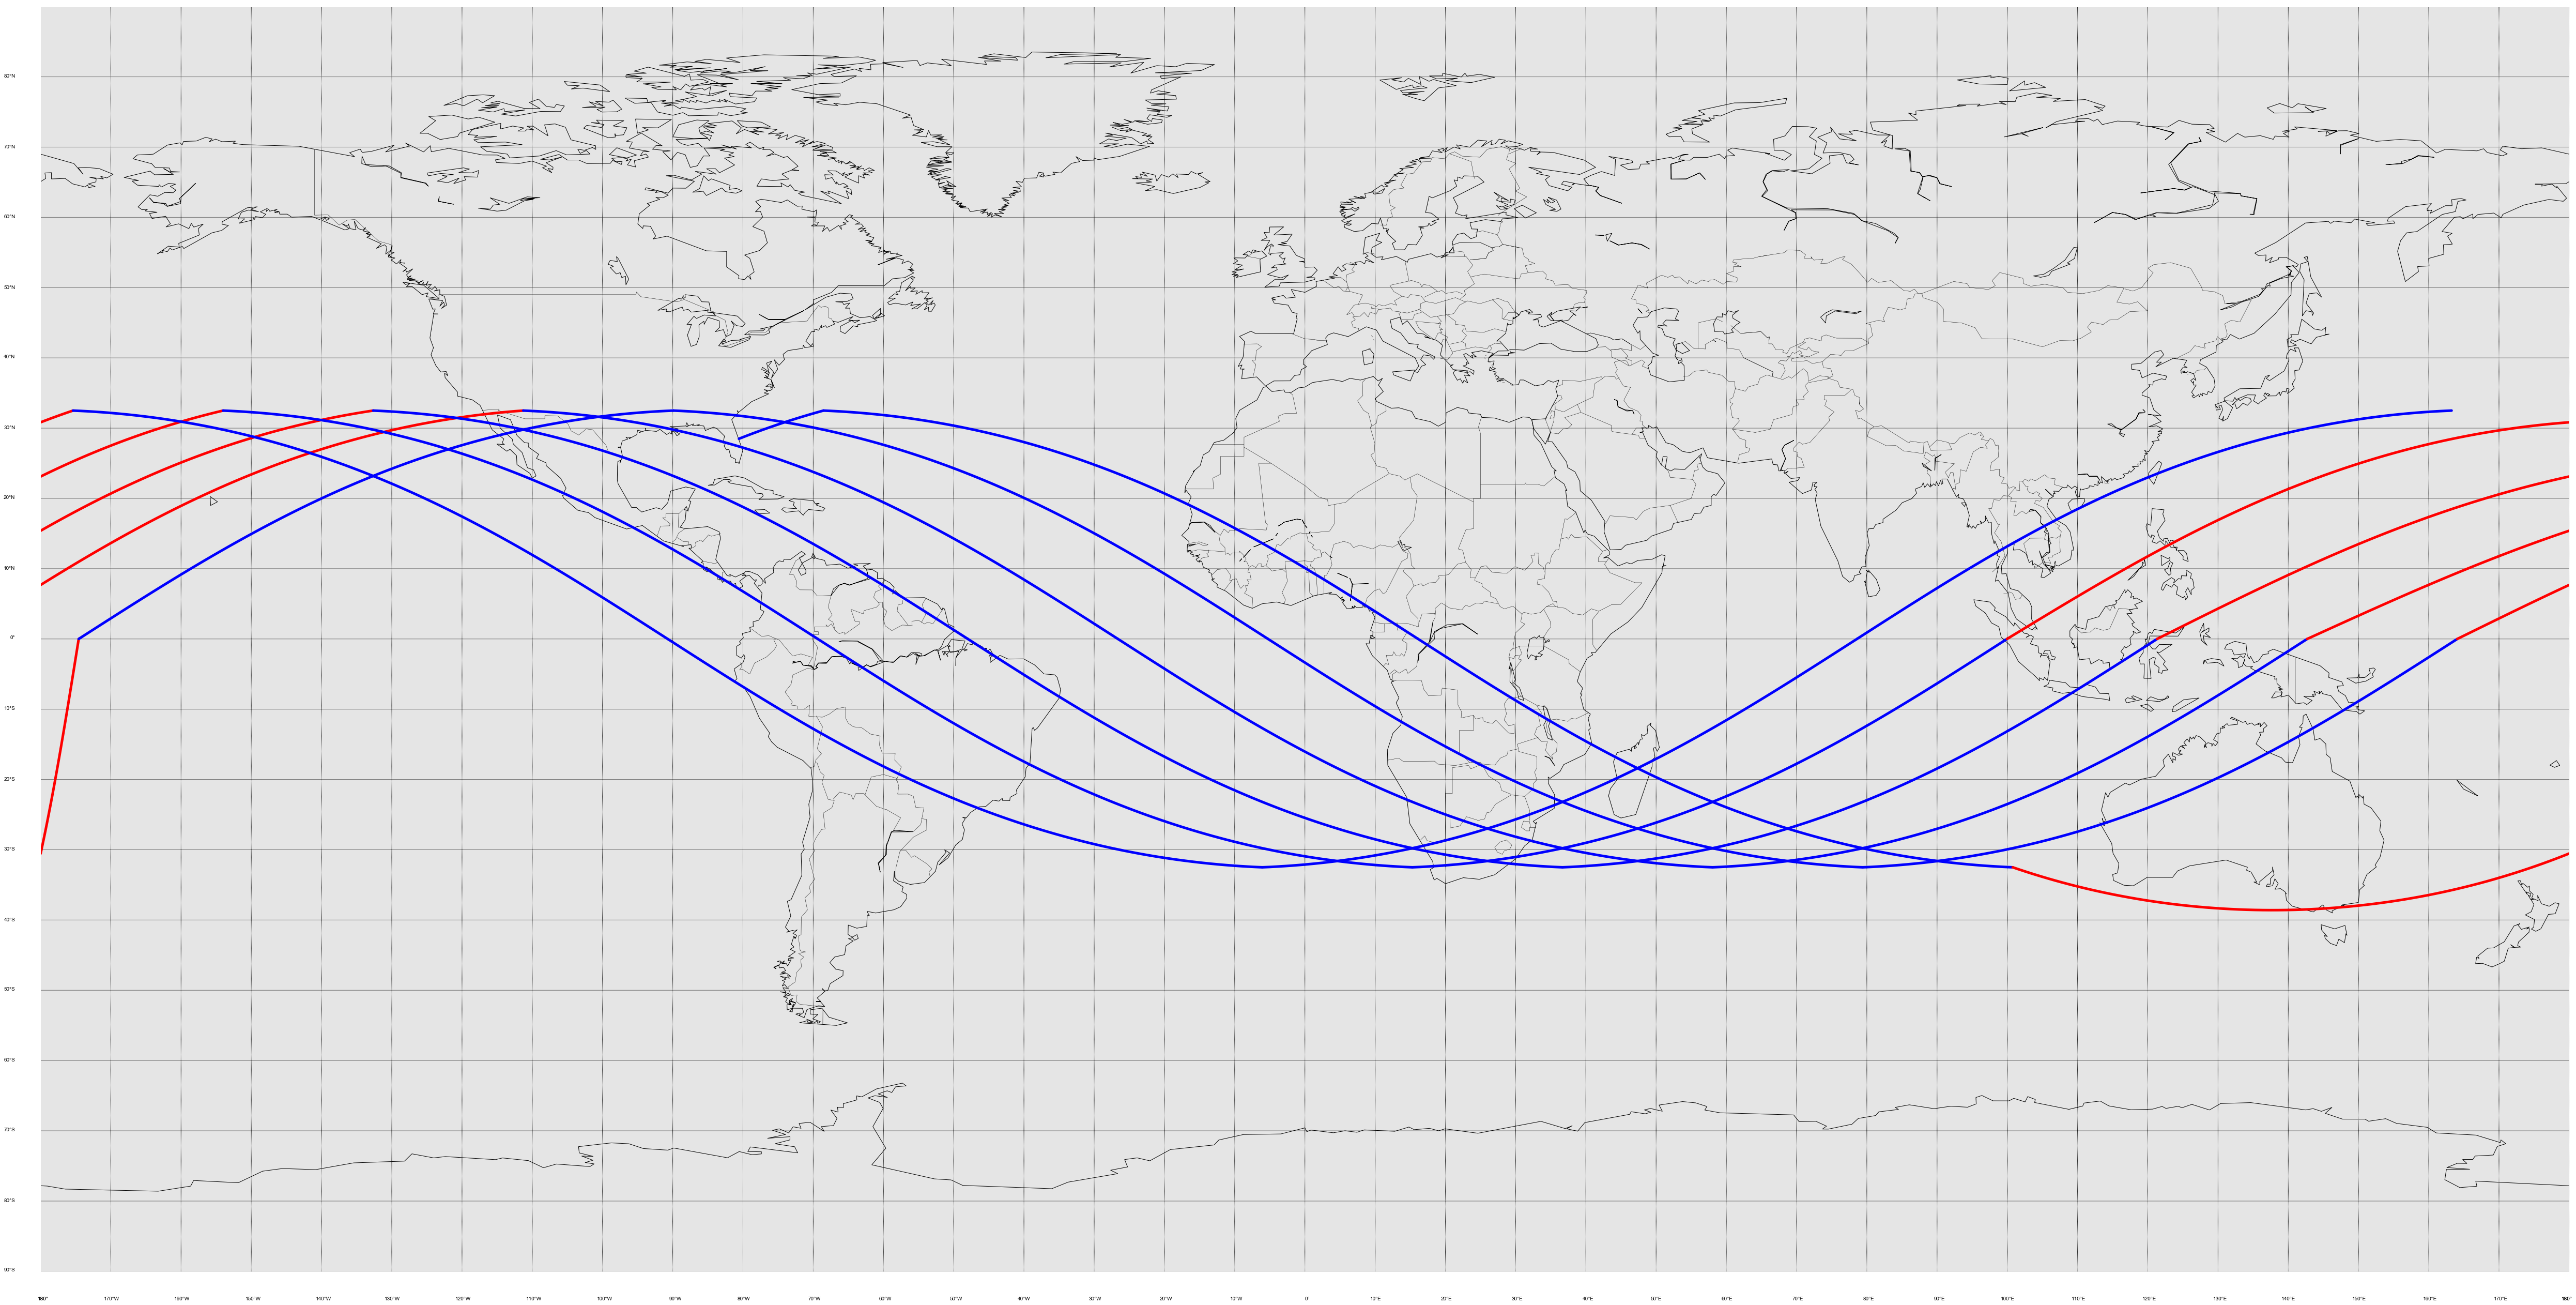

In [19]:
#Construction of test case of geovisualization
#dfgeoviz['']

fig = plt.figure(figsize=(90,45))
map = Basemap()
map = Basemap(lat_0=0, lon_0=0)
map.drawparallels(np.arange(-90,90,10),labels=[1,0,0,1])
map.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1])
map.drawcountries(linewidth=0.5)
map.drawcoastlines()
 
    
def drawwrapped(startlon, startlat, endlon, endlat):
    percentsplit = ((endlon-180)/90)
        
    splitlat = (1-percentsplit) * (startlat+endlat)

    endlon = endlon-360
    map.drawgreatcircle(startLON, startLAT, 179.99, splitlat, color='red', linewidth = 5)
    map.drawgreatcircle(-179.99, splitlat, endlon, endlat, color='red', linewidth = 5)        
    return(endlon, endlat)
    
        
for i in range(1):
    #Generate a single arc for orbital insertion
    launchLON = dfgeoviz['LaunchLON']
    launchLAT = dfgeoviz['LaunchLAT']
    endLAT = dfgeoviz['orbit_inclination']
    endLON = launchLON + (3 * (endLAT-launchLAT))
    map.drawgreatcircle(launchLON, launchLAT, endLON, endLAT, color='blue', linewidth = 5)
    currenttime = launchdatetime
    
    #Get the direction of latitude for a sine function applied to the orbit
    if endLAT > 0:
        lat_index = 90
    elif endLAT < 0:
        lat_index = 180
    
    #Calculates how much the earth rotates under each orbit based on orbit period
    #The Earth rotates at 15 degrees per hour. 
    epsilon = (dfgeoviz['period_in_seconds']/60) * 0.06
    
    for i in range(24):
        currenttime = currenttime + datetime.timedelta(0, 0, 0, 0, (dfgeoviz['period_in_seconds']/240))
        lat_index = lat_index+90
        
        startLON = endLON
        startLAT = endLAT
        endLON = endLON+90-epsilon
        endLAT = dfgeoviz['orbit_inclination'] * math.sin(math.radians(lat_index))
        
        if endLON > 180:
            endLON, endLAT = drawwrapped(startLON, startLAT, endLON, endLAT)
        elif endLON <= 180:
            map.drawgreatcircle(startLON, startLAT, endLON, endLAT, color='blue', linewidth = 5)
        
#plt.savefig('fig5.png', bbox_inches='tight', dpi = 240)
#plt.show()

0.6111111111111112


C:\Users\Rick\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Rick\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


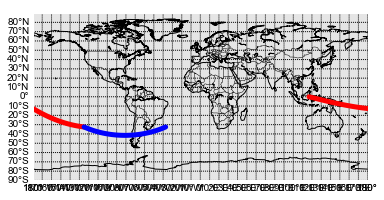

In [172]:
#Cell for development of wrapping function

startlon = 145
startlat = 0
endlon = startlon + 90
endlat = -32.5



def drawwrapped(startlon, startlat, endlon, endlat):
    percentsplit = ((endlon-180)/90)
        
    splitlat = (1-percentsplit) * (startlat+endlat)
        #print(splitlat)
    endlon = endlon-360
    map.drawgreatcircle(startLON, startLAT, 179.99, splitlat, color='red', linewidth = 5)
    map.drawgreatcircle(-179.99, splitlat, endlon, endlat, color='red', linewidth = 5)        
    return(endlon, endlat)
        
        
        #return(360, splitlat, endlon, endlat)
        #print(True)
        
        
map = Basemap()
map = Basemap(lat_0=0, lon_0=0)
map.drawparallels(np.arange(-90,90,10),labels=[1,0,0,1])
map.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1])
map.drawcountries(linewidth=0.5)
map.drawcoastlines()

startlon, startlat = drawwrapped(startlon, startlat, endlon, endlat)
endlon = startlon + 90 - 2.3 #episilon
entlat = 0

map.drawgreatcircle(startlon, startlat, endlon, endlat, color='blue', linewidth = 5)